In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import plotly.express as px
import cartopy.crs as ccrs
import numpy as np
from Functions.Single_Flight_tools import *
from scipy.interpolate import BarycentricInterpolator

In [11]:
filepath='/Users/katlingarula/Desktop/Current_CU_Stuff/DLA/IndividualFlightData/EXS43DY.csv'
flight_df=pd.read_csv(filepath, header='infer')
flight_df

tx_latlonalt=[51,-5.5,0]
rx_latlonalt=[52,-10,0]

wavelegnth=.003

In [12]:

def plotFlightPath(flightdf,tx,rx):

    #Get time since initial recordings
    flightmin=min(flightdf['time']) 
    flighttime=flightdf['time']-flightmin

    fig = plt.figure(dpi=800)#figsize=(20, 20), layout='constrained')
    #fig.suptitle("Flight Path")

    gs1 = GridSpec(25,25, left=0.05, right=0.98, wspace=0.05)

    #Determine latitude/longitude ranges to be displayed
    max_lat=max(flightdf['lat'])
    min_lat=min(flightdf['lat'])
    max_lon=max(flightdf['lon'])
    min_lon=min(flightdf['lon'])
    max_plot_lat=max(tx[0],rx[0],max_lat)+5
    min_plot_lat=min(tx[0],rx[0],min_lat)-5
    max_plot_lon=max(tx[1],rx[1],max_lon)+5
    min_plot_lon=min(tx[1],rx[1],min_lon)-5

    #Plot flight over continent with tx and rx relative locations
    #TODO: Write program to automatically determine latitude/longigude displayed when graphing
    tx_rx_plot = plt.subplot(gs1[0:18,:18],projection=ccrs.PlateCarree())
    tx_rx_plot.coastlines()
    tx_rx_plot.set_extent([min_plot_lat, max_plot_lat, min_plot_lon, max_plot_lon], crs=ccrs.PlateCarree())
    tx_rx_plot.scatter(flightdf['lat'], flightdf['lon'], color='indigo', linewidth=2, marker='o')
    tx_rx_plot.scatter(tx[0],tx[1],color='red') 
    tx_rx_plot.scatter(rx[0],rx[1],color='blue')
    tx_rx_plot.set_title("Flight vs Transmitter/Receiver")

    #Plot flight on world map
    worldplot=plt.subplot(gs1[0:10, 19:], projection=ccrs.PlateCarree())
    worldplot.coastlines()
    worldplot.add_feature(cfeature.BORDERS)
    worldplot.set_title("Flight on PlateCarree")
    worldplot.scatter(flightdf['lat'], flightdf['lon'], color='blue', linewidth=2, marker='o')
    worldplot.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    
    #plot flight location vs time
    pathplot=plt.subplot(gs1[12:18,19:], projection=ccrs.PlateCarree())
    pathplot.set_title("Flight Location vs Time")
    pathplot.coastlines()
    pathplot.set_extent([min_plot_lat, max_plot_lat, min_plot_lon, max_plot_lon], crs=ccrs.PlateCarree()) 
    pathplot.scatter(flightdf['lat'], flightdf['lon'], c=flighttime, cmap='cividis') #I don't know why I need this line and the one bellow but I do
    scatter = pathplot.scatter(flightdf['lon'], flightdf['lat'], c=flighttime, cmap='cividis')
    cbar = plt.colorbar(scatter, ax=pathplot, orientation='vertical')
    cbar.set_label('Time (s)')  # Set the label for the colorbar

    #Plot altitide as function os time
    altplot = fig.add_subplot(gs1[20:, 0:6])
    altplot.scatter(flighttime, flightdf['geoaltitude']) #label Axies, Title where it's taking off from (Google Callsign)
    altplot.set_title("Flight Altitude vs Time")
    altplot.set_xlabel("Time (s)")
    altplot.set_ylabel("Altitude (m)")

    #plot latitude vs time
    lat_time_plot=fig.add_subplot(gs1[20:,9:15])
    lat_time_plot.scatter(flighttime,flightdf['lat'])
    lat_time_plot.set_title("Flight Latitude vs Time")
    lat_time_plot.set_xlabel("Time (s)")
    lat_time_plot.set_ylabel("Latitude")

    #Plot longitude vs time
    lat_time_plot=fig.add_subplot(gs1[20:,19:])
    lat_time_plot.scatter(flighttime,flightdf['lon'])
    lat_time_plot.set_title("Flight Longitude vs Time")
    lat_time_plot.set_xlabel("Time (s)")
    lat_time_plot.set_ylabel("Longitude")

    plt.show()#dpi=4)
    #plt.savefig('./figs/corr_validation.png', dpi=400, bbox_inches='tight')


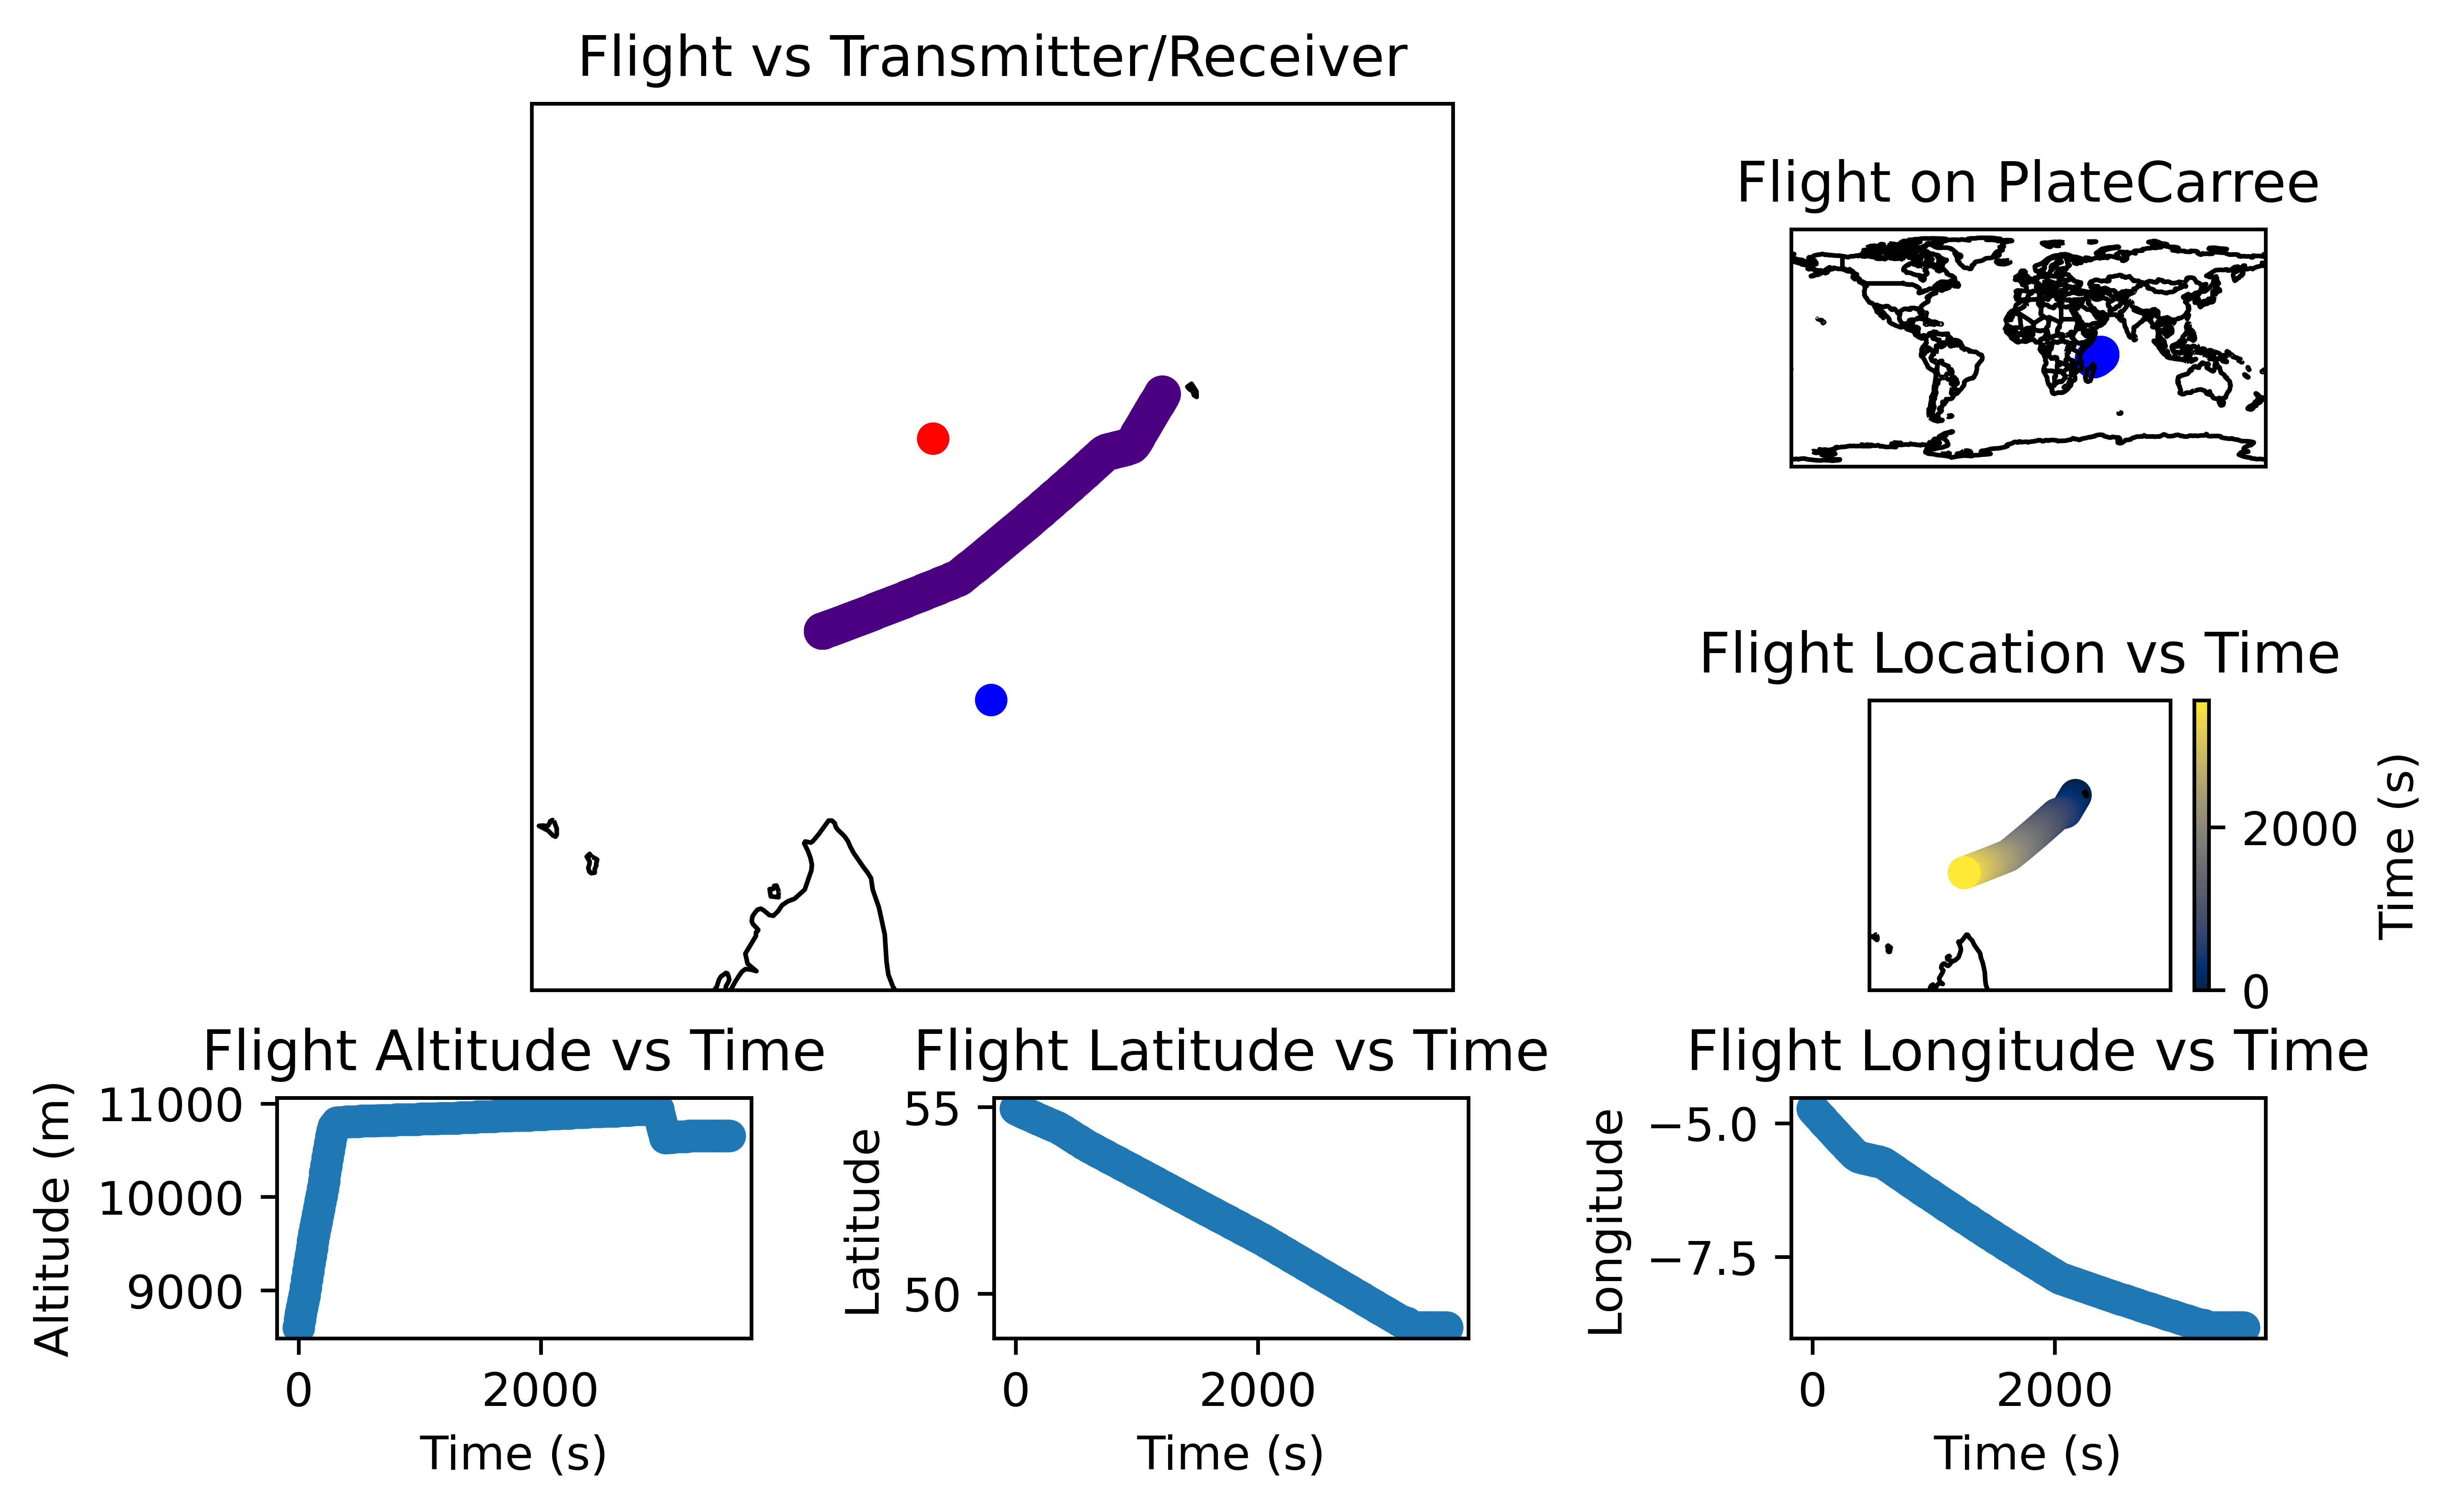

In [13]:
#Run 
#exec(open("Functions/Single_Flight_tools.py").read()) #Run Single_Flight_tools.py to use functions in it

plotFlightPath(flight_df,tx_latlonalt,rx_latlonalt) #Create multiple plots with info about flight path

In [14]:
flight_df,tx_xyz,rx_xyz=convertCoords(flight_df,tx_latlonalt,rx_latlonalt)

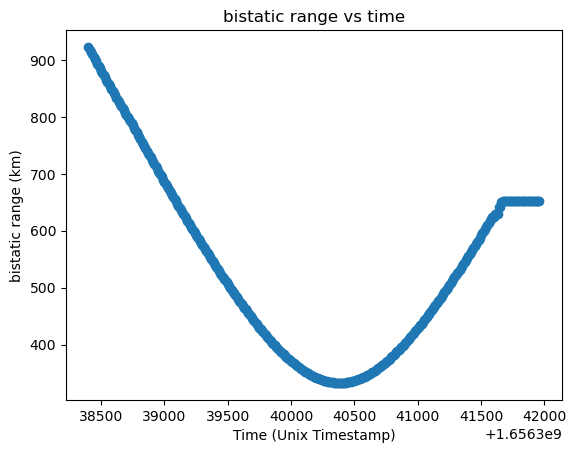

In [15]:
flight_df,brange=bistaticrange(tx_xyz,rx_xyz,flight_df) #I have learned that Python does not like when you just try to take the first value

,Unnamed: 0,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,...,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,X,Y,Z,brange
195,1833612,1656340350,40700.0,51.599106,-7.774048,216.722625,206.504228,0.00000,EXS43DY,False,...,False,2163.0,10668.0,10881.36,1.656340e+09,1.656340e+09,3940.371596,-537.945596,4982.971078,332.920864
196,1844307,1656340360,40700.0,51.582067,-7.787704,216.262370,206.565051,0.00000,EXS43DY,False,...,False,2163.0,10668.0,10881.36,1.656340e+09,1.656340e+09,3941.717439,-539.086395,4981.791387,332.770439
197,1854399,1656340370,40700.0,51.564377,-7.801926,216.492925,206.686827,0.00000,EXS43DY,False,...,False,2163.0,10668.0,10881.36,1.656340e+09,1.656340e+09,3943.113715,-540.274432,4980.566052,332.670562
198,1865342,1656340380,40700.0,51.546844,-7.816030,216.492925,206.686827,0.00000,EXS43DY,False,...,False,2163.0,10668.0,10881.36,1.656340e+09,1.656340e+09,3944.496691,-541.453172,4979.351214,332.628332
199,1879121,1656340390,40700.0,51.529836,-7.829742,216.492925,206.686827,0.00000,EXS43DY,False,...,False,2163.0,10668.0,10881.36,1.656340e+09,1.656340e+09,3945.837393,-542.599369,4978.172221,332.641429
200,1887412,1656340400,40700.0,51.512658,-7.843552,216.722625,206.504228,0.00000,EXS43DY,False,...,False,2163.0,10668.0,10881.36,1.656340e+09,1.656340e+09,3947.191118,-543.754880,4976.981060,332.708700
201,1898994,1656340410,40700.0,51.495108,-7.857590,216.722625,206.504228,0.32512,EXS43DY,False,...,False,2163.0,10668.0,10881.36,1.656340e+09,1.656340e+09,3948.574154,-544.931240,4975.763614,332.833390


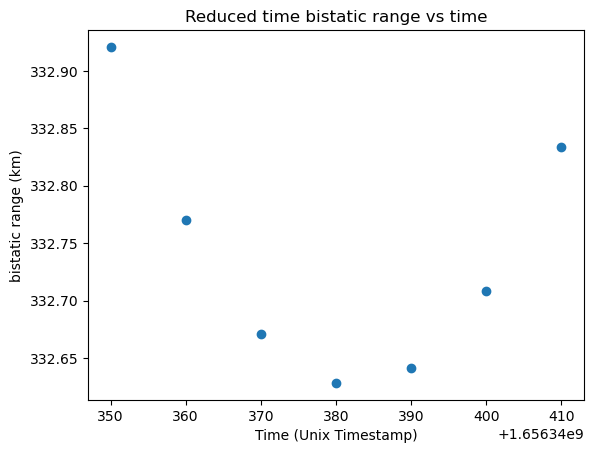

In [16]:
reduced_df=timeCut(flight_df,60) 
reduced_df

In [17]:
def calcCyclePhase1(df,wavelegnth,resolution,showgraph):
    df = df.copy().reset_index(drop=True)
    #Calculate cycles
    df["cycles"]=df['brange']/wavelegnth


    min_index=df.index.min()
    cycles_init=df['cycles'][min_index]

    df['phase']=cycles_init-df['cycles']

    #I realized I should save this until the interpolation is complete
    df['phase_wraping']=jt.interferometry.wrap_phase(2*3.14*df['phase'])

#TODO: Eventually I need to adjust this so that everything fits together in a subplot like above
    if (showgraph==True):
        plt.figure(1)
        plt.scatter(df['time'], df['cycles']) 
        plt.title("Cycle number vs Time")
        plt.xlabel("Time (Unix Timestamp)")
        plt.ylabel("# Phase Cycles")

        min_index=df.index.min()
        cycles_init=df['cycles'][min_index]

        plt.figure(2)
        df['phase']=cycles_init-df['cycles']
        plt.scatter(df['time'], df['phase']) 
        plt.title("Phase vs Time")
        plt.xlabel("Time (Unix Timestamp)")
        plt.ylabel("Phase")

        #I realized I should save this until the interpolation is complete
        df['phase_wraping']=jt.interferometry.wrap_phase(2*3.14*df['phase'])

        plt.figure(3)
        plt.scatter(df['time'], df['phase_wraping']) 
        plt.title("Phase Wraping with wavelegnth 10 ft(I think)")
        plt.xlabel("Time (Unix Timestamp)")
        plt.ylabel("Phase Wraping")

    timePhase_df=df[['time','phase']].copy()

    df_toInterpolate=pd.DataFrame(columns=['time','phase'])
    df_toInterpolate=df_toInterpolate.reset_index(drop=True)

    N=resolution*len(timePhase_df)
    x=0

    #Convert so that time index starts at 0
    #mintime=timePhase_df['time'].min()
    #timePhase_df['time']=timePhase_df['time']-mintime

    x=np.linspace(timePhase_df['time'][0], timePhase_df['time'][len(timePhase_df)-1], num=N)

    P=BarycentricInterpolator(timePhase_df['time'],timePhase_df['phase'])#Creates a function P which values can be put into

    phase=P(x)
    phase_wrap=jt.interferometry.wrap_phase(2*3.14*P(x))

    plt.figure()
    plt.scatter(x,phase_wrap,1)
    plt.title("Interpolated Wraped Phase vs Time")
    plt.xlabel("Time (Unix Timestamp)")
    plt.ylabel("Phase Wraping")

    interpolated_df=pd.DataFrame({'time_s':x,'phase':phase,'phaseWraping':phase_wrap}) #These values would be what you plug into the auto calibration

    return interpolated_df

#Function that interpolatesdatapoints to sufficient resolution

#Note that having all of this in one class could be usefull, but i need more time to think about how that would work

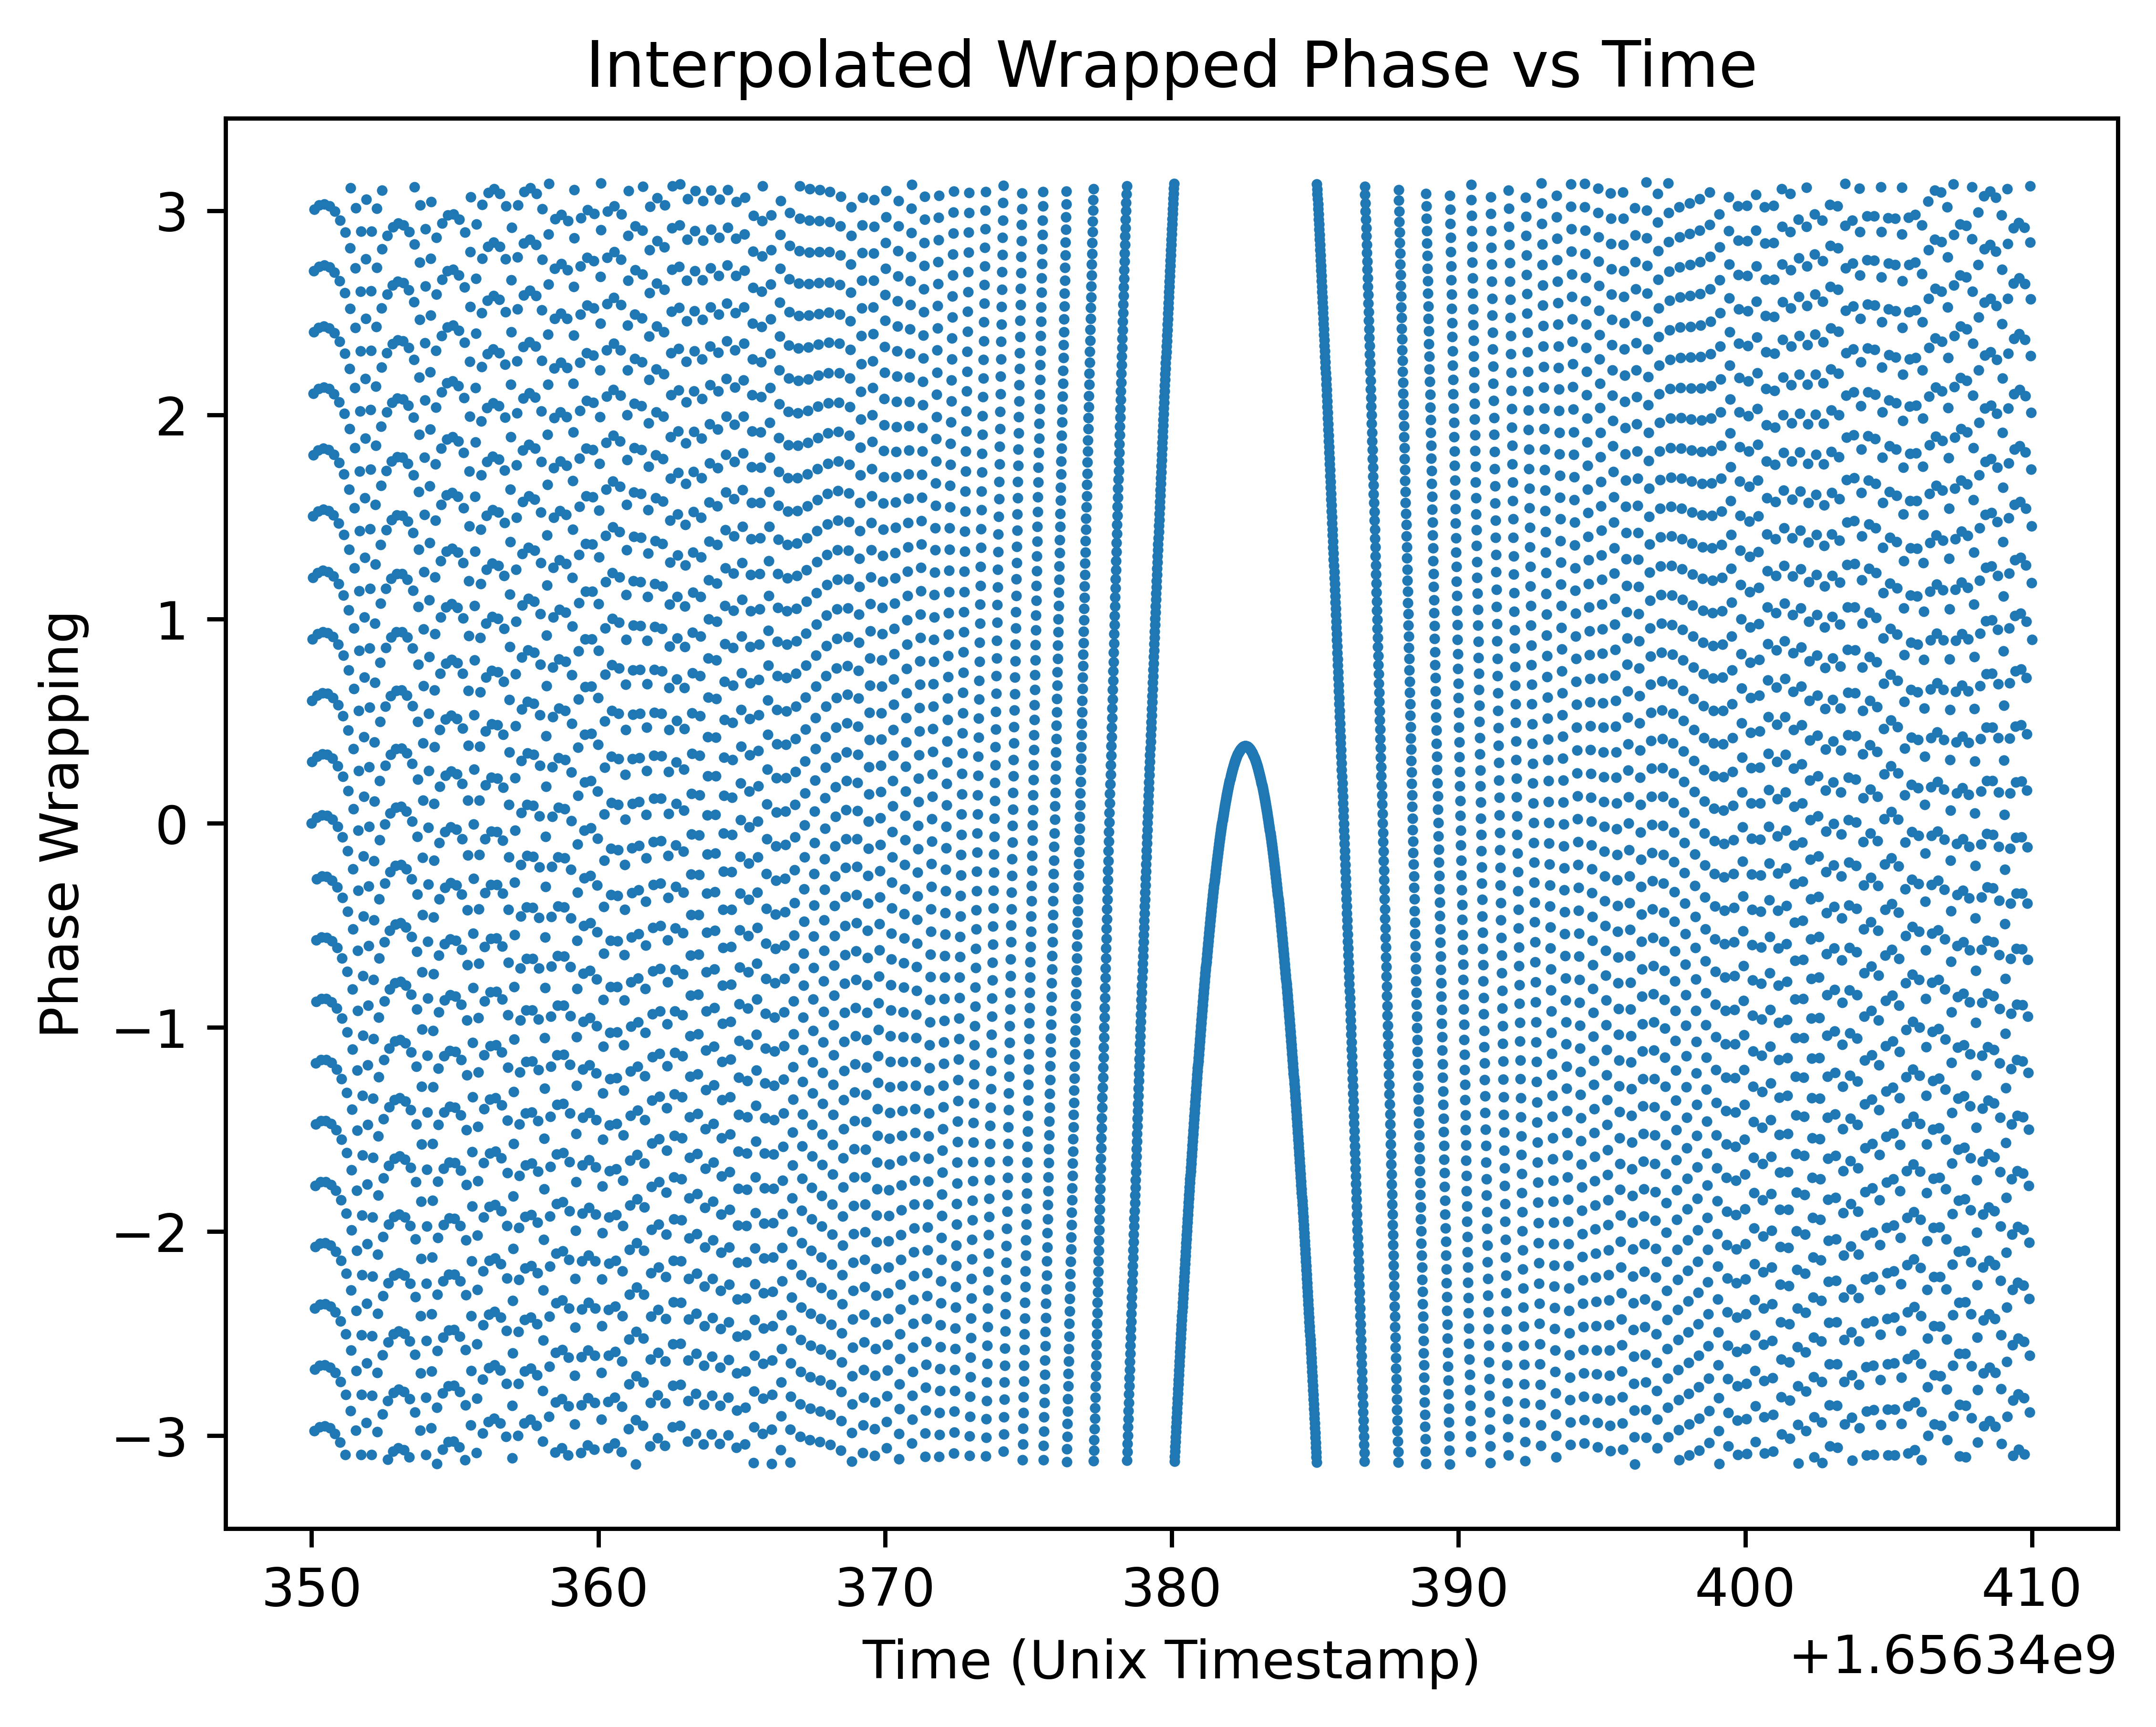

In [18]:
df=calcCyclePhase(reduced_df,wavelegnth,1000,False)
